# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Описание данных

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах(м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении


## Изучение данных из файла

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [27]:
try:
    data = pd.read_csv('/Users/pols/Git_repositories/personal-projects-da/Исследовательский анализ данных/datasets/real_estate_data.csv', sep='\t')
    data.info()   
    display(data.head())
except: 
    print('Неверный путь к файлу')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

Датасет включает 23699 строки, пропущенных значений достаточно много. Сразу можно отбросить столбцы, данные которых не понадобятся в исследовании: **'ponds_nearest'**, **'ponds_around3000'**, **'parks_nearest'**, **'parks_around3000'**, **'airports_nearest'**, **'open_plan'**, **'studio'**, **'is_apartment'**. 
Важные для исследования стоблцы - **'ceiling_height'** имеет пропущенные значения. Скорее всего, люди просто не указывали в объявлении эти данные. Возможно, есть какая-то связь между высотой потолков и населенным пунктом или этажностью, пропуски можно будет заполнить после анализа этой версии.
Пропуски в **'days_exposition'** можно оставить на месте, так как столбец будет рассматриваться изолированно, и для этого данных достаточно. В столбце **'balcony'** NaNы, можно принять за отсутствие балкона и просто заменить на 0.
**'living_area'** и **'kitchen_area'** важны для анализа, пропуси в них, возможно, нужно будет высчитать.


## Предобработка данных

### Определите и изучите пропущенные значения. 

In [6]:
#рассмотрим все значения в столбце высоты потолков:
data['ceiling_height'].value_counts()

2.50      3515
2.60      1646
2.70      1574
3.00      1112
2.80       993
          ... 
27.50        1
5.00         1
3.59         1
4.80         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64

In [7]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

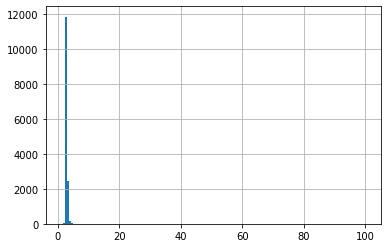

In [8]:
data['ceiling_height'].hist(bins=150)

В данных отсутствует большая часть информации, имеющиеся значения сконцентрированы в районе 2,6 метров, присутствуют "аномальные" значения вроде 100 метров. "Дыру" в данных можно заполнить, сгруппировав данные столбца по данным других столбцов, с которыми предположительно могла бы коррелировать высота потолка.

In [9]:
#сгруппируем данные по этажности, городу и выведем медиану: 
data.groupby(['locality_name', 'floors_total'])['ceiling_height'].median().head(30)

locality_name  floors_total
Бокситогорск   3.0             5.000
               4.0             2.800
               5.0               NaN
Волосово       1.0               NaN
               2.0               NaN
               3.0               NaN
               4.0             2.500
               5.0             2.525
Волхов         2.0             3.000
               3.0             3.000
               4.0             2.700
               5.0             2.500
               6.0               NaN
               9.0             2.600
Всеволожск     2.0             2.600
               3.0             2.700
               4.0             2.785
               5.0             2.625
               6.0             2.700
               7.0             2.700
               8.0             2.700
               9.0             2.600
               10.0            2.600
               11.0            2.700
               12.0            2.750
               13.0            2.600
          

In [10]:
data['locality_name'].value_counts()

Санкт-Петербург             15721
посёлок Мурино                522
посёлок Шушары                440
Всеволожск                    398
Пушкин                        369
                            ...  
посёлок Мыза-Ивановка           1
деревня Старое Хинколово        1
деревня Реброво                 1
деревня Меньково                1
поселок Севастьяново            1
Name: locality_name, Length: 364, dtype: int64

На основе полученной информации можно заключить, что нецелесообразно заполнять пропуски в 'ceiling_height'. Пропущена почти половина данных, а на основе оставшихся нельзя установить связь с другими столбцами. 

In [11]:
#рассмотрим стоблец этажности:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [12]:
data['floors_total'].value_counts()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
33.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64

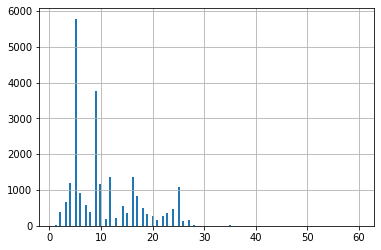

In [13]:
data['floors_total'].hist(bins=150);

Данные выглядят приемлемыми для анализа: значения достаточно однородны, а пропущенных значений мало по отношению ко всему датасету (89 строк). Как и в случае с высотой потолков, выявить корреляцию по имеющимся данным невозможно, а заполнить пропуски общим медианным значением было бы ошибочно. Весь стоблец пригодится для группировки данных столбца 'floor', поэтому можем удалить строки с пропусками.

In [14]:
data = data.dropna(subset=['floors_total']).reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23613 entries, 0 to 23612
Data columns (total 22 columns):
total_images            23613 non-null int64
last_price              23613 non-null float64
total_area              23613 non-null float64
first_day_exposition    23613 non-null object
rooms                   23613 non-null int64
ceiling_height          14495 non-null float64
floors_total            23613 non-null float64
living_area             21743 non-null float64
floor                   23613 non-null int64
is_apartment            2775 non-null object
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            21382 non-null float64
balcony                 12133 non-null float64
locality_name           23565 non-null object
airports_nearest        18081 non-null float64
cityCenters_nearest     18104 non-null float64
parks_around3000        18105 non-null float64
parks_nearest           8045 non-null float64
ponds_around300

Далее можно перейти к заполнению пропусков в столбцах **'living_area'** и **kitchen_area**. Как видно, в столбце **'total_area'** нет пропущенных значений, поэтому будет опираться на него при заполнении пропусков, так как есть неоспоримая связь между жилой и общей площадью квартиры.

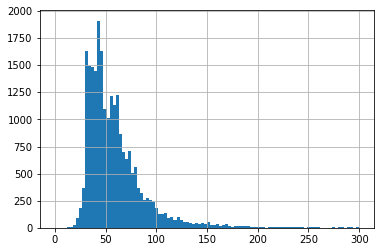

In [15]:
#рассмотрим распределение значений в столбце с данными о площади:
data['total_area'].hist(bins=100, range=(0, 300));

In [16]:
data['total_area'].describe()

count    23613.000000
mean        60.340678
std         35.648988
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

Находим в данных аномальные значения, но их количество незначительно, и для заполнения будет определена медиана по категории.

In [17]:
#напишем функцию для создания категорий по общей площади и создадим отдельный столбец: 
def area_category(area):
    if area < 30:
        return '0'
    if 30 <= area < 60:
        return '1'
    if 60 <= area < 100:
        return '2'
    if 100 <= area < 200:
        return '3'
    if 200 <= area < 400:
        return '4'
    if area >= 400:
        return '5'
data['area_category'] = data['total_area'].apply(area_category)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,3
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,1
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,1
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,3
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,3


In [18]:
#заполняем пропуски в жилой площади на медиану по категории и проверяем результат:
data['living_area'] = data['living_area'].fillna(data.groupby('area_category')['living_area'].transform('median'))
data['living_area'].isna().sum()

0

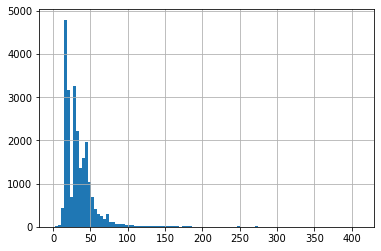

In [19]:
data['living_area'].hist(bins=100);

In [20]:
#то же проделываем с площадью кухни:
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('area_category')['kitchen_area'].transform('median'))
data['kitchen_area'].isna().sum()

0

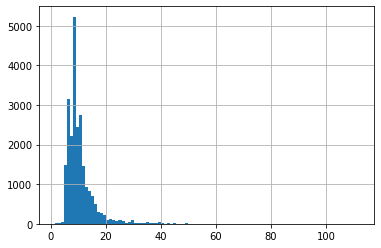

In [21]:
data['kitchen_area'].hist(bins=100);

In [22]:
data['is_apartment'].isna().sum()

20838

В столбце 'is_apartment' пропущена бОльшая часть значений. Не удивительно, ведь для российских квартир это достаточно не популярный критерий жилья. В исследовании данные столбца не участвуют, поэтому нет смысла заменять пропуски.

In [23]:
data.drop(columns = 'is_apartment', axis = 1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23613 entries, 0 to 23612
Data columns (total 22 columns):
total_images            23613 non-null int64
last_price              23613 non-null float64
total_area              23613 non-null float64
first_day_exposition    23613 non-null object
rooms                   23613 non-null int64
ceiling_height          14495 non-null float64
floors_total            23613 non-null float64
living_area             23613 non-null float64
floor                   23613 non-null int64
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            23613 non-null float64
balcony                 12133 non-null float64
locality_name           23565 non-null object
airports_nearest        18081 non-null float64
cityCenters_nearest     18104 non-null float64
parks_around3000        18105 non-null float64
parks_nearest           8045 non-null float64
ponds_around3000        18105 non-null float64
ponds_nearest

In [24]:
data['balcony'].isna().sum()

11480

In [25]:
#заменяем пропуски на ноль
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

In [26]:
#посмотрим на пропуски в столбце названия населенных пунктов:
data.query('locality_name.isnull()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category
1093,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,False,...,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0,2
2027,6,5398000.0,80.00,2017-05-30T00:00:00,3,NaN,4.0,42.60,2,False,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,2
2596,20,3351765.0,42.70,2015-09-20T00:00:00,1,NaN,24.0,15.60,3,False,...,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0,1
2625,2,5130593.0,62.40,2015-10-11T00:00:00,2,NaN,24.0,33.10,21,False,...,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0,2
3563,10,4200000.0,46.50,2016-05-28T00:00:00,2,NaN,5.0,30.80,5,False,...,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0,1
4137,17,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,False,...,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0,2
4175,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,...,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0,2
4655,1,5500000.0,83.00,2015-08-14T00:00:00,3,NaN,7.0,43.30,6,False,...,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0,2
5324,19,13540000.0,85.50,2016-01-20T00:00:00,3,NaN,7.0,59.10,5,False,...,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0,2
5688,7,3700000.0,30.00,2016-04-29T00:00:00,1,NaN,24.0,20.00,23,False,...,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0,1


Если решить, что столбец **'cityCenters_nearest'** хранит в себе расстояния до центра Санкт-Петербурга, можно заполнить пропуски в **'locality_name'**, опираясь на расстояния. Для этого наметим, на каком расстоянии Питер заканчивается.

In [27]:

data.query('locality_name == "Санкт-Петербург"')[['cityCenters_nearest', 'locality_name']].describe()


,cityCenters_nearest
count,15591.000000
mean,11588.493939
std,4832.354845
min,181.000000
25%,8322.000000
50%,12242.000000
75%,14938.500000
max,29493.000000


In [28]:
data.query('cityCenters_nearest < 20000')['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Парголово', nan],
      dtype=object)

In [29]:
data.query('cityCenters_nearest < 18000')['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', nan, 'посёлок Парголово'],
      dtype=object)

In [30]:
data.query('cityCenters_nearest < 17000')['locality_name'].unique()

array(['Санкт-Петербург', nan], dtype=object)

Как видим, исключительно Санкт-Петербург встречается до 17км, после уже попадаются другие населенные пункты, граница довольно размыта. 
Так, пропущенные населенные пункты можно заполнить, опираясь на границу в 17км. 
C помощью .loc() выделим нужные ячейки и заполним пропуски.

In [31]:
data.loc[(data['locality_name'].isna())&(data['cityCenters_nearest'] < 17000), 'locality_name'] = 'Санкт-Петербург'

In [32]:
#посмотрим на строки с оставшимися пропусками
data.query('locality_name.isnull()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_category
2027,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.6,2,False,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,2
2596,20,3351765.0,42.7,2015-09-20T00:00:00,1,NaN,24.0,15.6,3,False,...,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0,1
2625,2,5130593.0,62.4,2015-10-11T00:00:00,2,NaN,24.0,33.1,21,False,...,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0,2
6741,20,4895892.0,60.7,2015-03-12T00:00:00,2,NaN,24.0,31.9,3,False,...,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,468.0,2
13169,1,2919911.0,29.4,2015-03-12T00:00:00,1,2.75,24.0,21.1,2,False,...,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,470.0,0
13634,7,3500000.0,71.0,2016-06-23T00:00:00,3,2.75,2.0,45.6,1,False,...,2.0,NaN,20234.0,23659.0,0.0,NaN,2.0,296.0,92.0,2
14213,2,4422000.0,60.0,2016-03-23T00:00:00,2,2.75,23.0,32.0,14,False,...,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,90.0,2
14282,3,3611000.0,53.5,2017-04-27T00:00:00,1,NaN,4.0,25.8,3,False,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0,1
16435,2,4995573.0,56.9,2016-06-17T00:00:00,2,NaN,24.0,29.2,14,False,...,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,4.0,1
17466,2,5985000.0,79.8,2018-07-30T00:00:00,3,NaN,9.0,43.3,2,False,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213.0,2


Можно заметить идентичные значения (17369). Проверим, соответствует ли им одинаковые населенные пункты.

In [33]:
data.query( 'cityCenters_nearest < 17369')['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары'], dtype=object)

Так как точной границы между Питером и поселком Шушары нет, корректный способ для заполнения подобрать нельзя, и можем удалить строки с пропущенными значениями, так как они остались в незначитиельном количестве.

In [34]:
data = data.dropna(subset=['locality_name']).reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23594 entries, 0 to 23593
Data columns (total 22 columns):
total_images            23594 non-null int64
last_price              23594 non-null float64
total_area              23594 non-null float64
first_day_exposition    23594 non-null object
rooms                   23594 non-null int64
ceiling_height          14490 non-null float64
floors_total            23594 non-null float64
living_area             23594 non-null float64
floor                   23594 non-null int64
studio                  23594 non-null bool
open_plan               23594 non-null bool
kitchen_area            23594 non-null float64
balcony                 23594 non-null float64
locality_name           23594 non-null object
airports_nearest        18070 non-null float64
cityCenters_nearest     18093 non-null float64
parks_around3000        18094 non-null float64
parks_nearest           8045 non-null float64
ponds_around3000        18094 non-null float64
ponds_nearest

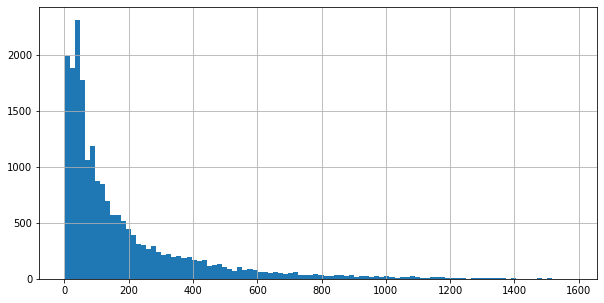

In [35]:
data['days_exposition'].hist(bins=100, figsize=(10, 5));

Принято решение не удалять пропуски, так как столбец исследуется изолированно от других данных, и имеющейся в нем информации достаточно для ответов на вопросы. То же касается столбцов **'airports_nearest'**, **'parks_around3000'**, **'parks_nearest'**, **'ponds_around3'**, **'ponds_nearest'**: их данные не повлияют на исследование.

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23594 entries, 0 to 23593
Data columns (total 22 columns):
total_images            23594 non-null int64
last_price              23594 non-null float64
total_area              23594 non-null float64
first_day_exposition    23594 non-null object
rooms                   23594 non-null int64
ceiling_height          14490 non-null float64
floors_total            23594 non-null float64
living_area             23594 non-null float64
floor                   23594 non-null int64
studio                  23594 non-null bool
open_plan               23594 non-null bool
kitchen_area            23594 non-null float64
balcony                 23594 non-null float64
locality_name           23594 non-null object
airports_nearest        18070 non-null float64
cityCenters_nearest     18093 non-null float64
parks_around3000        18094 non-null float64
parks_nearest           8045 non-null float64
ponds_around3000        18094 non-null float64
ponds_nearest

In [37]:
data['locality_name'].value_counts()

Санкт-Петербург             15680
посёлок Мурино                520
посёлок Шушары                439
Всеволожск                    398
Пушкин                        369
                            ...  
посёлок Мыза-Ивановка           1
деревня Старое Хинколово        1
деревня Реброво                 1
деревня Меньково                1
поселок Севастьяново            1
Name: locality_name, Length: 364, dtype: int64

При обработке столбца **'locality_name'** были обнаружены неявные дубликаты, "прятавшиеся" разным написанием слов с буквами "ё" и "е". Приведем все населенные пункты к единому написанию.

In [38]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [39]:
data['locality_name'].head(30)

0               Санкт-Петербург
1                поселок Шушары
2               Санкт-Петербург
3               Санкт-Петербург
4               Санкт-Петербург
5     городской поселок Янино-1
6             поселок Парголово
7               Санкт-Петербург
8                поселок Мурино
9               Санкт-Петербург
10              Санкт-Петербург
11                    Ломоносов
12                    Сертолово
13                     Петергоф
14                       Пушкин
15              Санкт-Петербург
16              Санкт-Петербург
17              Санкт-Петербург
18              Санкт-Петербург
19              Санкт-Петербург
20            поселок Парголово
21              Санкт-Петербург
22              деревня Кудрово
23              Санкт-Петербург
24              Санкт-Петербург
25              Санкт-Петербург
26              Санкт-Петербург
27              Санкт-Петербург
28                       Пушкин
29              Санкт-Петербург
Name: locality_name, dtype: object

### Приведение данных к нужным типам.

Для удобства работы с данными необходимо сократить вес и грамоздкость типа float, приведя его к целочисленному типу. 
Чтобы работать со столбцом **'first_day_exposition'** и извлечь из него нужную информацию, необходимо привести его данные к формату datetime.

In [40]:
data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format= '%Y-%m-%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23594 entries, 0 to 23593
Data columns (total 22 columns):
total_images            23594 non-null int64
last_price              23594 non-null int64
total_area              23594 non-null float64
first_day_exposition    23594 non-null datetime64[ns]
rooms                   23594 non-null int64
ceiling_height          14490 non-null float64
floors_total            23594 non-null int64
living_area             23594 non-null float64
floor                   23594 non-null int64
studio                  23594 non-null bool
open_plan               23594 non-null bool
kitchen_area            23594 non-null float64
balcony                 23594 non-null int64
locality_name           23594 non-null object
airports_nearest        18070 non-null float64
cityCenters_nearest     18093 non-null float64
parks_around3000        18094 non-null float64
parks_nearest           8045 non-null float64
ponds_around3000        18094 non-null float64
ponds_neare

## Расчёты и добавление результатов в таблицу

Посчитайте и добавьте в таблицу
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [41]:
#цена квадратного метра:
data['square_price'] = round(data['last_price']/data['total_area']).astype(int)

#день недели, месяц и год публикации объявления:
data['exposition_day'] = data['first_day_exposition'].dt.weekday
data['exposition_month'] = data['first_day_exposition'].dt.month
data['exposition_year'] = data['first_day_exposition'].dt.year

#этаж квартиры:
def apartment_floor(data):
    if data['floor'] == 1:
        return 'первый'
    if (data['floor'] == data['floors_total']):
        return 'последний'
    return 'другой'

data['apartment_floor'] = data.apply(apartment_floor, axis=1)

#соотношение жилой и общей площади:
data['living_total_ratio'] = round((data['living_area']/data['total_area']) * 100, 1)

#отношение площади кухни к общей:
data['kitchen_total_ratio'] = round((data['kitchen_area']/data['total_area']) * 100, 1)
 
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,ponds_nearest,days_exposition,area_category,square_price,exposition_day,exposition_month,exposition_year,apartment_floor,living_total_ratio,kitchen_total_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,NaN,3,120370,3,3,2019,другой,47.2,23.1
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,NaN,81,1,82921,1,12,2018,первый,46.0,27.2
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,574.0,558,1,92786,3,8,2015,другой,61.2,14.8
3,0,64900000,159.0,2015-07-24,3,NaN,14,71.5,9,False,...,234.0,424,3,408176,4,7,2015,другой,45.0,10.1
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121,3,100000,1,6,2018,другой,32.0,41.0


После рассчетов были добавлены новые столбцы: **'square_price'**, **'exposition_day'**, **'exposition_month'**, **'exposition_year'**, **'apartment_floor'**, **'living_total_ratio'** **'kitchen_total_ratio'**. 

## Исследовательский анализ данных

Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

In [42]:
#изменим формат записи цены, чтобы убрать лишние для чтения графиков нули:
data['last_price_divided'] = data['last_price']/1000

In [43]:
#функция для автоматизации процесса построения гистограмм
def make_plot(column, range, ylim):
    print(data[column].describe())
    data[column].plot(title = column, kind='hist', bins = 200, grid=True, range=(range), figsize=(10, 6))
    plt.show()
    data.boxplot([column], figsize=(5, 10))
    plt.ylim(ylim)
    plt.show()

count    23594.000000
mean        60.336668
std         35.652106
min         12.000000
25%         40.000000
50%         52.000000
75%         69.787500
max        900.000000
Name: total_area, dtype: float64


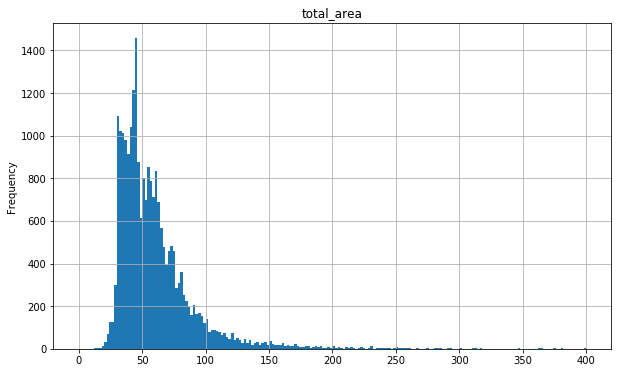

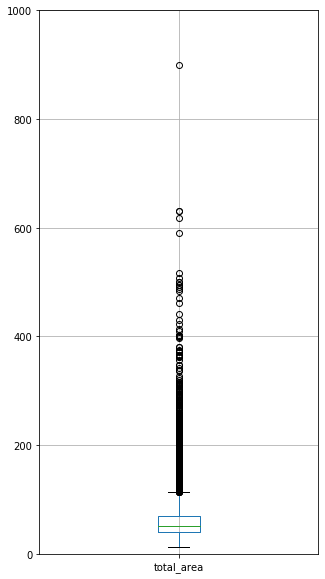

In [44]:
make_plot('total_area', (0, 400), (0, 1000))

По графику видно, что у большинства квартир общая площадь находится в диапазоне от 30 до 75м²,
а также есть выбивающиеся редкие значения от 150м² до 900м², которые и влияют на стандартное отклоение. Для точного анализа позднее избавимся от таких значений. 

count     23594.000000
mean       6541.904844
std       10905.649537
min          12.190000
25%        3400.000000
50%        4650.000000
75%        6800.000000
max      763000.000000
Name: last_price_divided, dtype: float64


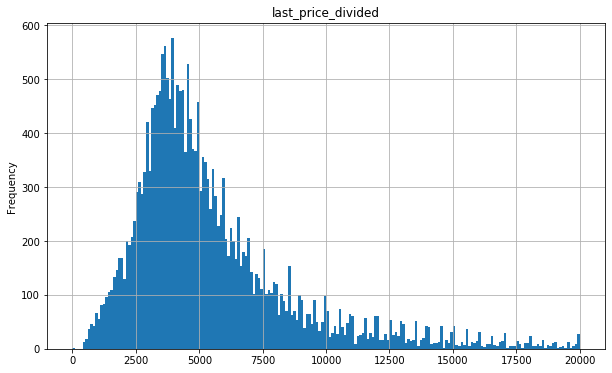

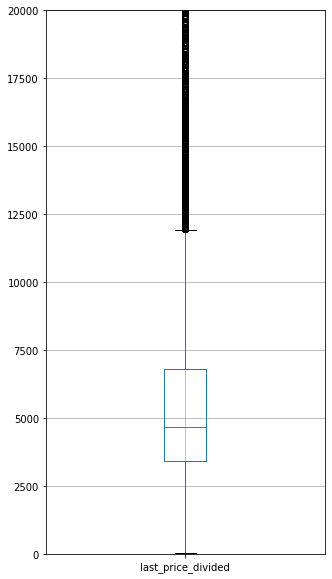

In [45]:
make_plot('last_price_divided', (0, 20000), (-10, 20000))

Самые распространенные цены квартир - от 2,5 млн рублей до 6 млн. Нормальное распределение цен сохраняется до 20 млн, за ним наблюдаются выбросы с единичными выбивающимися значениями от 100 до 760млн.

count    23594.000000
mean         2.071289
std          1.078610
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


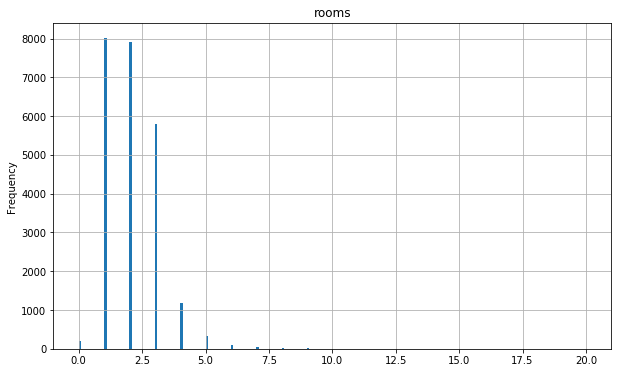

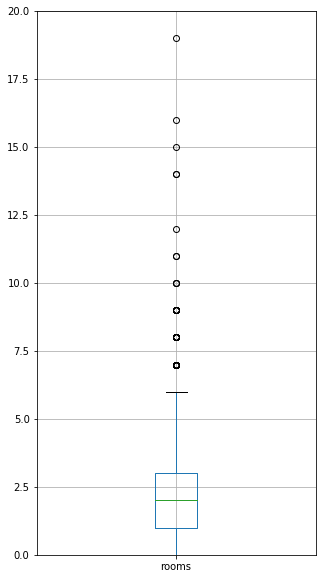

In [46]:
#число комнат
make_plot('rooms', (0, 20), (0, 20))

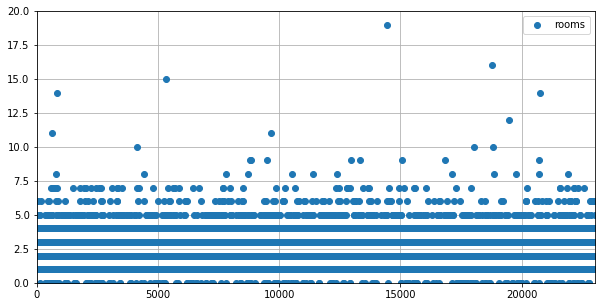

In [47]:
data.plot(y='rooms', style='o', ylim=(0, 20), xlim=(0, 23000), grid=True, figsize=(10, 5))
plt.show()

In [48]:
data['rooms'].value_counts()

1     8009
2     7904
3     5791
4     1177
5      325
0      194
6      104
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

Самые распространенные значения в столбце 'rooms' - от 1 до 4х комнат, выбросы начинаются от 6 комнат и заканчиваются 19ю. 

count    14490.000000
mean         2.771516
std          1.261661
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


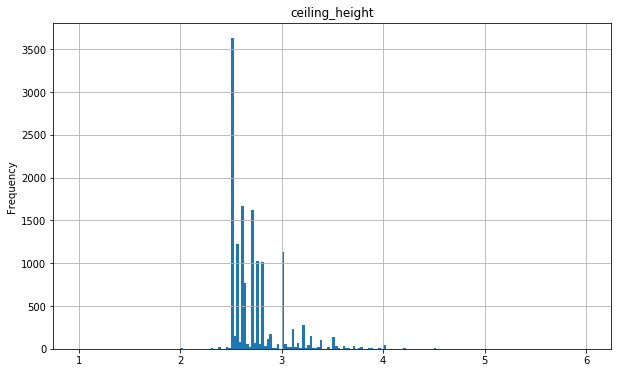

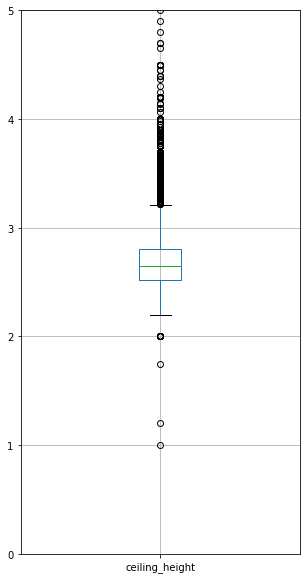

In [49]:
make_plot('ceiling_height', (1, 6), (0, 5))

Большая часть значений находится в диапазоне между 2мя и 3мя метрами, выбивающиеся значения мы можем отчетливо заметить  на диаграмме размаха: здесь встречается высота потолков до 2х метров, а так же больше 20 и одно значение в 100м. 

count    20423.000000
mean       180.887039
std        219.736496
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


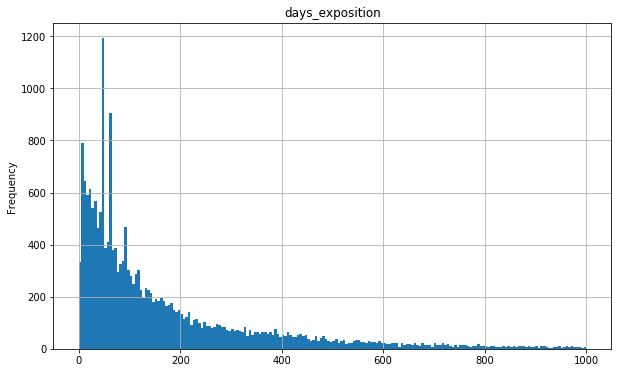

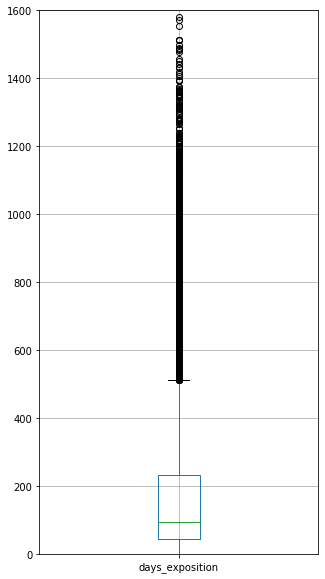

In [50]:
#время продажи квартиры
make_plot('days_exposition', (0, 1000), (0, 1600))

На графике видны пики в районе 45, 60 и 90 дней. Эти выбивающиеся значения следует отбросить для поиска обычного времени продажи квартир. 

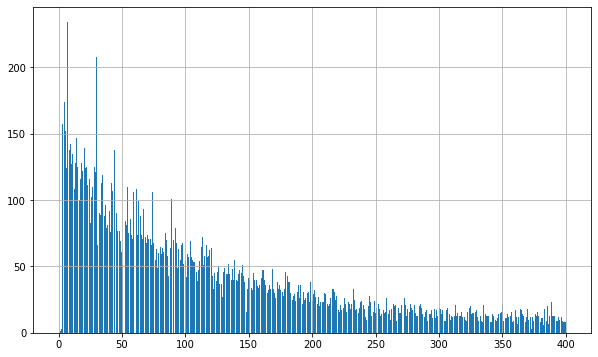

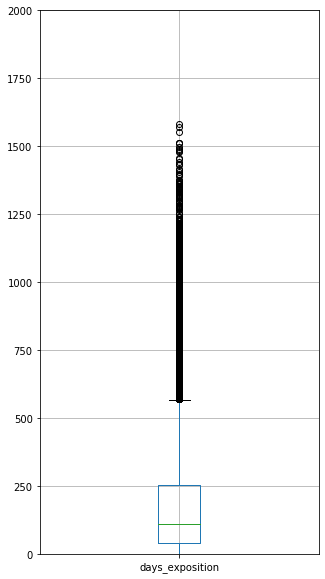

count    18805.000000
mean       191.671151
std        225.726249
min          1.000000
25%         41.000000
50%        110.000000
75%        252.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [51]:
data_filtered = data.query('days_exposition != 45 and \
    days_exposition != 60 and \
    days_exposition != 90')
data_filtered['days_exposition'].hist(bins=500,  figsize=(10, 6), range=(0, 400))
plt.show()
data_filtered.boxplot('days_exposition', figsize=(5, 10))
plt.ylim(0, 2000)
plt.show()
data_filtered['days_exposition'].describe()

Без пиковых значений остались очень быстрые и необычно долгие продажи. Очень быстрыми продажами можно считать продажи, совершенные в срок меньше недели, а необычно долгими, согласно гистограмме, - больше 600 дней(примерно полтора года). Именно на этой отметке продажи становятся значительно реже).

In [52]:
data_filtered.query('days_exposition < 7')['days_exposition']

53       6
62       5
94       4
106      6
292      3
        ..
23339    4
23400    4
23492    6
23502    4
23556    6
Name: days_exposition, Length: 611, dtype: Int64

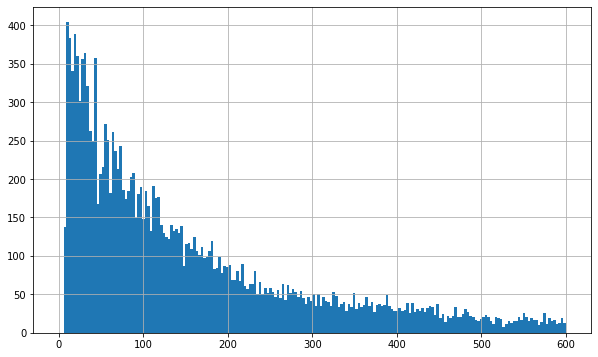

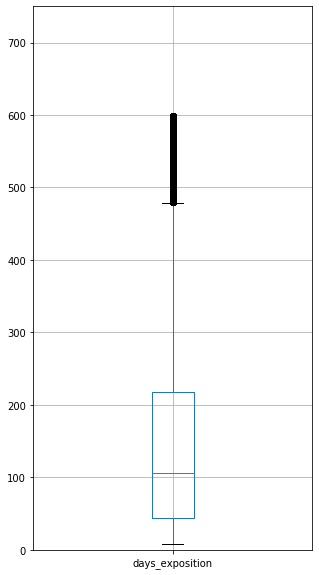

count    16762.000000
mean       153.863024
std        140.270993
min          8.000000
25%         44.000000
50%        106.000000
75%        218.000000
max        599.000000
Name: days_exposition, dtype: float64

In [53]:
#убираем самые быстрые и долгие продожи:
data_filtered2 = data_filtered.query('7 < days_exposition < 600')
data_filtered2['days_exposition'].hist(bins=200,  figsize=(10, 6), range=(0, 600));
plt.show()
data_filtered2.boxplot('days_exposition', figsize=(5, 10))
plt.ylim(0, 750)
plt.show()
data_filtered2['days_exposition'].describe() 

После того как отбросили очень быстрые и очень долгие сделки, можно заключить, что продажа квартиры обычно занимает от 40 до 218ти дней (7 месяцев). 

### Удаление редких и выбивающихся значений.

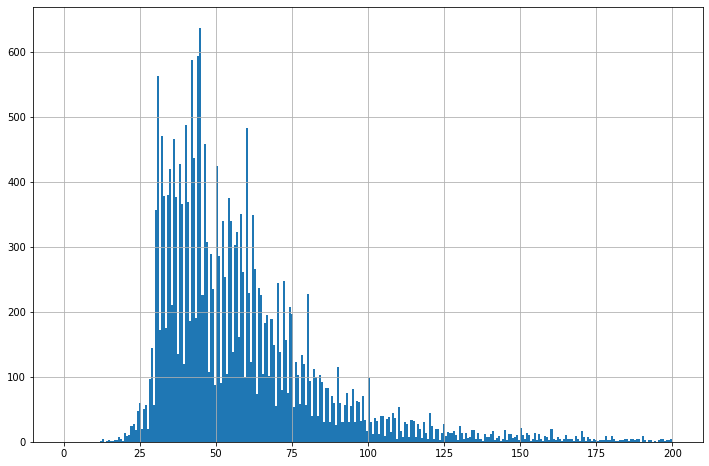

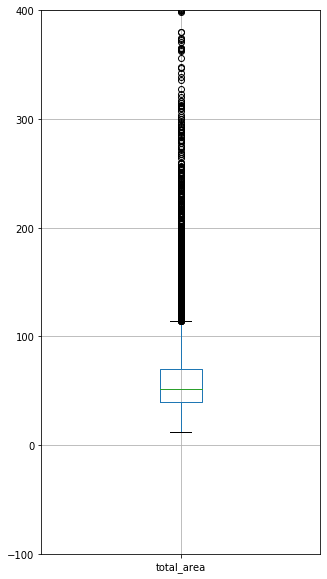

In [54]:
#площадь
data['total_area'].hist(bins=300, figsize=(12,8), range=(0, 200));
plt.show()
data.boxplot(['total_area'], figsize=(5, 10));
plt.ylim(-100, 400)
plt.show()

In [55]:
data.query('20 < total_area and total_area >= 150')['total_area'].count()

580

Выбивающимися значениями можно считать площади менее 20м² и более 150м². Согласно графикам и фильтрам, они редки, поэтому можем удалить их из таблицы.

In [56]:
data = data.drop(data.loc[(data['total_area']<20)|(data['total_area']>=150)].index).reset_index(drop=True)
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,days_exposition,area_category,square_price,exposition_day,exposition_month,exposition_year,apartment_floor,living_total_ratio,kitchen_total_ratio,last_price_divided
22982,9,9700000,133.81,2017-03-21,3,3.7,5,73.3,3,False,...,NaN,3,72491,1,3,2017,другой,54.8,10.3,9700.0
22983,14,3100000,59.00,2018-01-15,3,NaN,5,38.0,4,False,...,45,1,52542,0,1,2018,другой,64.4,14.4,3100.0
22984,18,2500000,56.70,2018-02-11,2,NaN,3,29.7,1,False,...,NaN,1,44092,6,2,2018,первый,52.4,14.6,2500.0
22985,13,11475000,76.75,2017-03-28,2,3.0,17,43.3,12,False,...,602,2,149511,1,3,2017,другой,56.4,30.4,11475.0
22986,4,1350000,32.30,2017-07-21,1,2.5,5,12.3,1,False,...,NaN,1,41796,4,7,2017,первый,38.1,27.9,1350.0


В столбце цены, согласно графикам, выбивается одно маленькое значение(12190). Цены более 20млн р можно назвать редкими, поэтому избавимся от них.

In [57]:
data['last_price_divided'].describe()

count     22987.000000
mean       5688.006158
std        4505.242900
min          12.190000
25%        3400.000000
50%        4590.000000
75%        6500.000000
max      124000.000000
Name: last_price_divided, dtype: float64

In [58]:
data.query('last_price == "12190" or last_price >= 20000000')['total_area'].count()

340

In [59]:
data = data.drop(data.loc[(data['last_price']<20000)|(data['last_price']>=20000000)].index).reset_index(drop=True)
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,days_exposition,area_category,square_price,exposition_day,exposition_month,exposition_year,apartment_floor,living_total_ratio,kitchen_total_ratio,last_price_divided
22642,9,9700000,133.81,2017-03-21,3,3.7,5,73.3,3,False,...,NaN,3,72491,1,3,2017,другой,54.8,10.3,9700.0
22643,14,3100000,59.00,2018-01-15,3,NaN,5,38.0,4,False,...,45,1,52542,0,1,2018,другой,64.4,14.4,3100.0
22644,18,2500000,56.70,2018-02-11,2,NaN,3,29.7,1,False,...,NaN,1,44092,6,2,2018,первый,52.4,14.6,2500.0
22645,13,11475000,76.75,2017-03-28,2,3.0,17,43.3,12,False,...,602,2,149511,1,3,2017,другой,56.4,30.4,11475.0
22646,4,1350000,32.30,2017-07-21,1,2.5,5,12.3,1,False,...,NaN,1,41796,4,7,2017,первый,38.1,27.9,1350.0


In [60]:
#удалим квартиру с выбивающимся значением по высоте потолков:
data = data.drop(data.loc[(data['ceiling_height']==100)].index).reset_index(drop=True)
data['ceiling_height'].describe()

count    13844.000000
mean         2.745147
std          0.983010
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max         32.000000
Name: ceiling_height, dtype: float64

### Какие факторы больше всего влияют на стоимость квартиры

Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

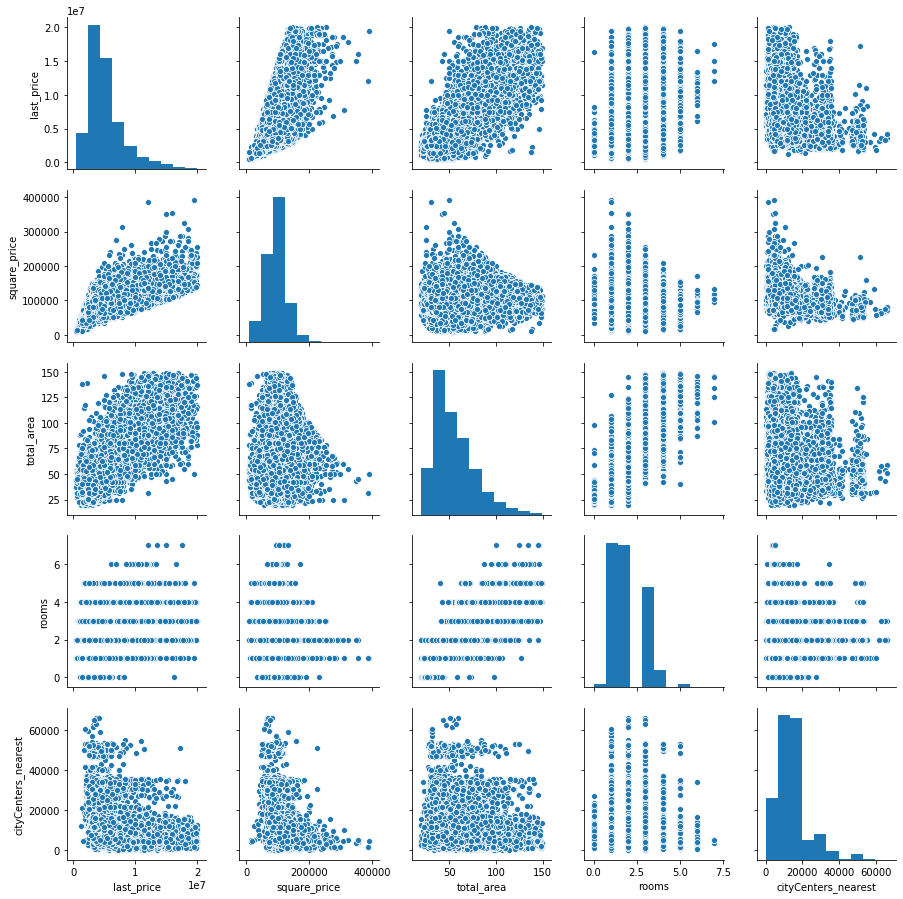

In [61]:
sns.pairplot(data[['last_price', 'square_price', 'total_area', 'rooms', 'apartment_floor', 'cityCenters_nearest']]);

Третья ячейка в верхнем ряду показывает положительную корреляцию между ценой и общей площадью квартиры. Можно заключить, что цена увеличивается пропорионально площади. Корреляция между количеством комнат и ценой положительная, а между количеством комнат и ценой за кв.м - слабая отрицательная. Более сильная отрицательная корреляция наблюдается между ценой и расстоянием от центра. Предсказуемо, близкое к центру жилье стоит дороже. То же можно сказать и про повышение цены квадратного метра при приближении к центру. 

In [62]:
def floor_ctgr(data):
    if data['apartment_floor'] == 'первый':
        return '1'
    if data['apartment_floor'] == 'другой':
        return '2'
    if data['apartment_floor'] == 'последний':
        return '3'

data['floor_ctgr'] = data.apply(floor_ctgr, axis=1)

In [63]:
data['floor_ctgr'] = pd.to_numeric(data['floor_ctgr'])

In [64]:
data[['last_price', 'square_price', 'exposition_day', 'exposition_month', 'exposition_year']].corr()

,last_price,square_price,exposition_day,exposition_month,exposition_year
last_price,1.000000,0.666525,-0.016410,0.007352,-0.021132
square_price,0.666525,1.000000,-0.012498,-0.002306,0.054106
exposition_day,-0.016410,-0.012498,1.000000,0.012706,-0.001548
exposition_month,0.007352,-0.002306,0.012706,1.000000,-0.269846
exposition_year,-0.021132,0.054106,-0.001548,-0.269846,1.000000


In [65]:
#для удобства изменим вид записи цены
data['last_price_div'] = data['last_price']/1000000

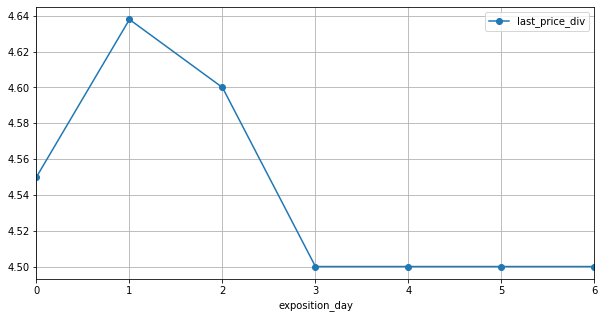

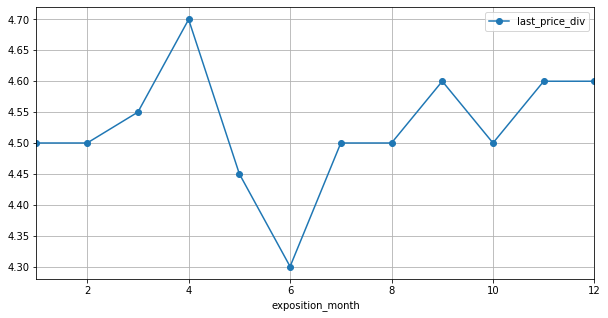

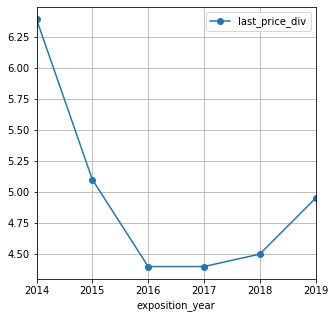

In [66]:
#медиана цен в день размещения
(
    data.pivot_table(index='exposition_day', values='last_price_div', aggfunc = 'median')
    .plot(grid=True, style='o-', figsize=(10, 5))
)
plt.show()

#медиана цен в месяц размещения
(
    data.pivot_table(index='exposition_month', values='last_price_div', aggfunc ='median')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()

#медиана цен в год размещения
(
    data.pivot_table(index='exposition_year', values='last_price_div', aggfunc ='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Резкое повышение цены характерно для объявлений, опубликованных в начале недели(с понедельника по среду). В разгар лета наблюдается спад цен на жилье, самым выгодным месяцем для покупки можно назвать июль, а для продажи выгоднее всего оказывается апрель. На графике зависимости цены от года видно, что с момента пика цен в 2014 году началось их падение, которое остановилось на период 2016-2017годов, после чего отмечается тенденция роста цен. 

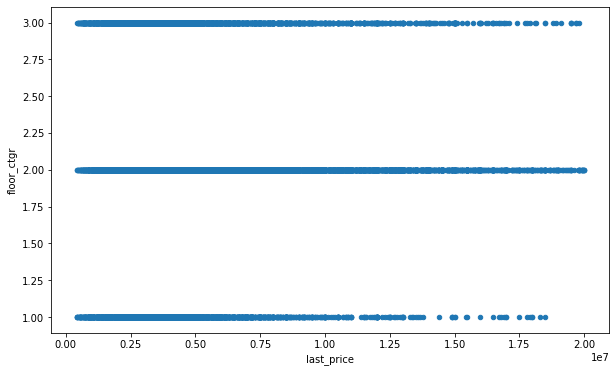

In [67]:
data.plot(x='last_price', y='floor_ctgr', kind='scatter', figsize=(10, 6));

Квартиры на первом этаже заметно "проседают" по цене.

### Выберите 10 населённых пунктов с наибольшим числом объявлений.

In [68]:
data['locality_name'].value_counts().head(10)

Санкт-Петербург      14781
поселок Мурино         552
поселок Шушары         438
Всеволожск             396
Пушкин                 355
Колпино                337
поселок Парголово      326
Гатчина                307
деревня Кудрово        299
Выборг                 235
Name: locality_name, dtype: int64

In [69]:
top_10_names = data['locality_name'].value_counts().head(10).index.values.tolist()
top_10_names

['Санкт-Петербург',
 'поселок Мурино',
 'поселок Шушары',
 'Всеволожск',
 'Пушкин',
 'Колпино',
 'поселок Парголово',
 'Гатчина',
 'деревня Кудрово',
 'Выборг']

In [70]:
top_10_data = data.query('locality_name in @top_10_names')
top_10_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,square_price,exposition_day,exposition_month,exposition_year,apartment_floor,living_total_ratio,kitchen_total_ratio,last_price_divided,floor_ctgr,last_price_div
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,120370,3,3,2019,другой,47.2,23.1,13000.0,2,13.000
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,82921,1,12,2018,первый,46.0,27.2,3350.0,1,3.350
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,92786,3,8,2015,другой,61.2,14.8,5196.0,2,5.196
3,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,100000,1,6,2018,другой,32.0,41.0,10000.0,2,10.000
5,6,3700000,37.3,2017-11-02,1,NaN,26,10.6,6,False,...,99196,3,11,2017,другой,28.4,38.6,3700.0,2,3.700


In [71]:
top_10_data_pivot = top_10_data.pivot_table(
                            index='locality_name',
                            values='square_price', 
                            aggfunc=['count','mean']).sort_values(('count','square_price'),                    
                            ascending =False).head(10).round({('mean', 'price_per_metre'):0}
                           )
display(top_10_data_pivot)


print('Самая высокая цена за кв.м. в')
display(top_10_data_pivot[top_10_data_pivot[('mean', 'square_price')] == top_10_data_pivot[('mean', 'square_price')].max()])

,count,mean
,square_price,square_price
locality_name,,
Санкт-Петербург,14781,108770.292335
поселок Мурино,552,85629.567029
поселок Шушары,438,78529.251142
Всеволожск,396,67259.386364
Пушкин,355,101809.383099
Колпино,337,75333.287834
поселок Парголово,326,90332.236196
Гатчина,307,68746.110749


Самая высокая цена за кв.м. в


,count,mean
,square_price,square_price
locality_name,,
Санкт-Петербург,14781,108770.292335


Предсказуемо, что самая высокая средняя цена за квадратный метр находится в Санкт-Петербурге. Меньше всего средняя цена в Выборге. 

In [72]:
data['km_from_centre'] = round(data['cityCenters_nearest']/1000)

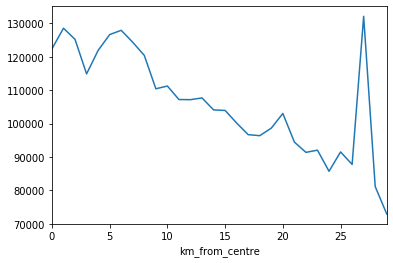

In [73]:
data.query('locality_name == "Санкт-Петербург"').groupby('km_from_centre')['square_price'].mean().plot();

Резкий скачок цен вниз можно отметить на 9км, значит, будем считать центром расстояние в радиусе 10км. 

### Проанализируем эту территорию - изучим следующие параметры: площадь, цена, число комнат, высота потолков

In [74]:
data['last_price_div'] = data['last_price']/1000000

In [75]:
data_centre_peter = data.query('locality_name == "Санкт-Петербург" & km_from_centre <=10 & ceiling_height < 20')

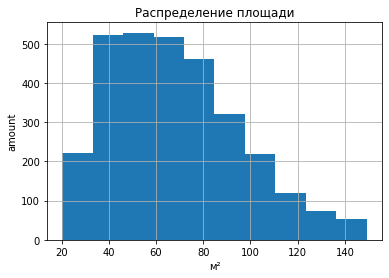

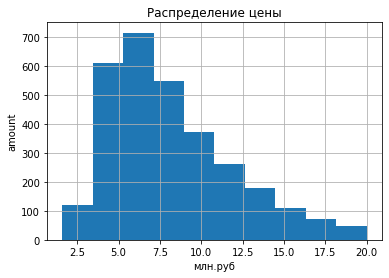

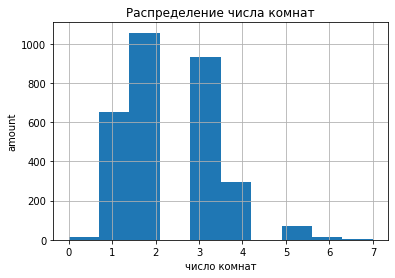

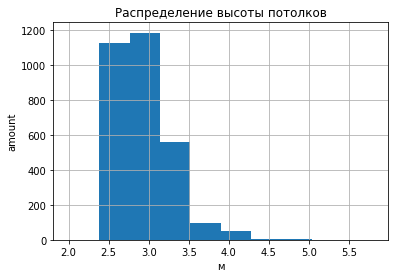

In [76]:
columns = ['total_area', 'last_price_div', 'rooms', 'ceiling_height']
columns_2 = ['м²', 'млн.руб', 'число комнат', 'м']
name = ['Распределение площади', 'Распределение цены', 'Распределение числа комнат', 'Распределение высоты потолков']
for i in range(len(columns)):
    data_centre_peter[columns[i]].hist()
    plt.title(name[i])
    plt.xlabel(columns_2[i])
    plt.ylabel('amount')
    plt.show()

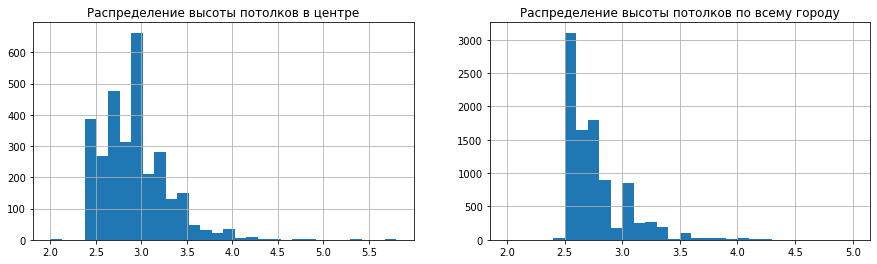

In [86]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2,figsize=(15,4))

data_centre_peter['ceiling_height'].hist(bins=30, ax=axes[0])
data[data['locality_name'] == 'Санкт-Петербург']['ceiling_height'].hist(bins=30, ax=axes[1], range=(2,5))

axes[0].set_title('Распределение высоты потолков в центре')
axes[1].set_title('Распределение высоты потолков по всему городу')

plt.show()

1) Наибольшее число квартир имеет площадь от 35 до 80м².
2) Диапазон распределения цен на квартиры - от 4 до 12,5 млн руб. Чаще всего встречаются ценники от 5 до 7,5 млн руб.
3) Самыми распространенные квартиры имеют 2 или 3 комнаты, третьи по популярности - однушки.
4) В основном в объявлениях встречаются квартиры с высотой потолков от 2,5 до 3,5м. Чаще всего можно найти квартиры с высотой потолков 3м. 

Теперь рассмотрим факторы, влияющие на цену жилья, для ограниченной территории (число комнат, этаж, удалённость от центра, дата размещения объявления).

In [78]:
data_centre_peter[['last_price', 'square_price', 'cityCenters_nearest']].corr()

,last_price,square_price,cityCenters_nearest
last_price,1.000000,0.494332,-0.318891
square_price,0.494332,1.000000,-0.107381
cityCenters_nearest,-0.318891,-0.107381,1.000000


In [79]:
data_centre_peter[['last_price', 'square_price', 'rooms']].corr()

,last_price,square_price,rooms
last_price,1.000000,0.494332,0.492391
square_price,0.494332,1.000000,-0.292305
rooms,0.492391,-0.292305,1.000000


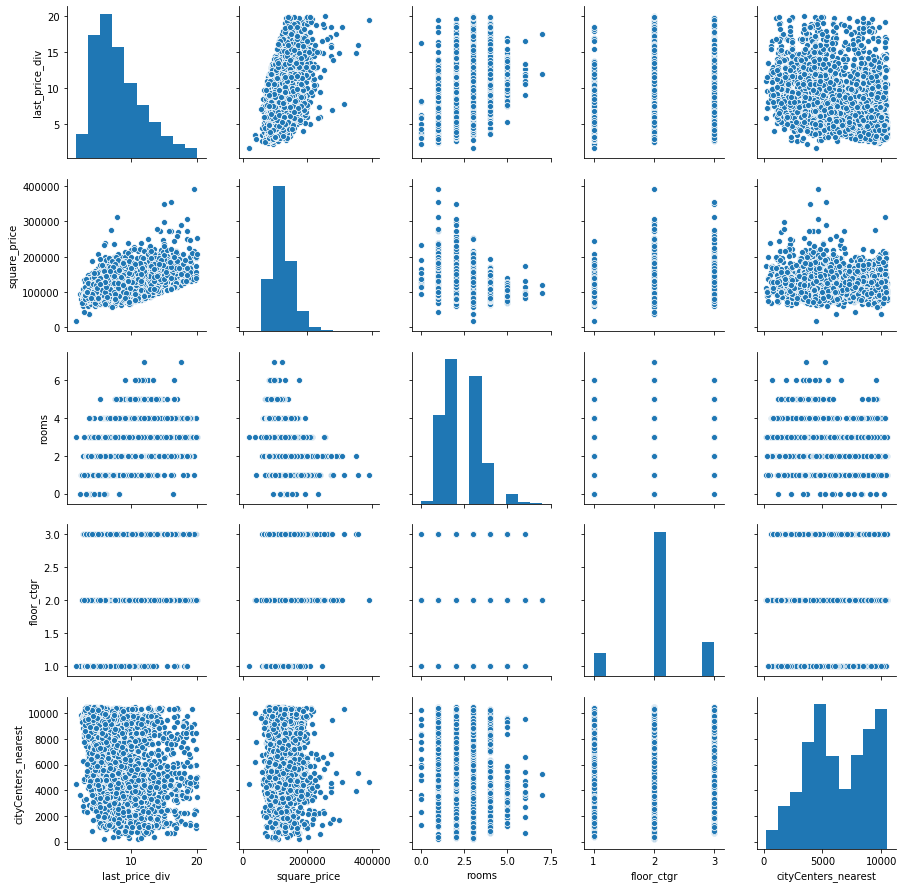

In [80]:
sns.pairplot(data_centre_peter[['last_price_div', 'square_price', 'rooms', 'floor_ctgr', 'cityCenters_nearest']]);

Количество комнат, как и во всей выборке, не имеет значительного влияния на цену квартиры. 
Наблюдается умеренная отрицательная корреляция между расстоянием от центра и ценой, аналогично данным всей выборки. Однако для центра характерно отсутствие большой зависимость цены за квадратный метр и расстояния от центра.
Число комнат, так же как и во всем датасете, влияет  на рост цены. 

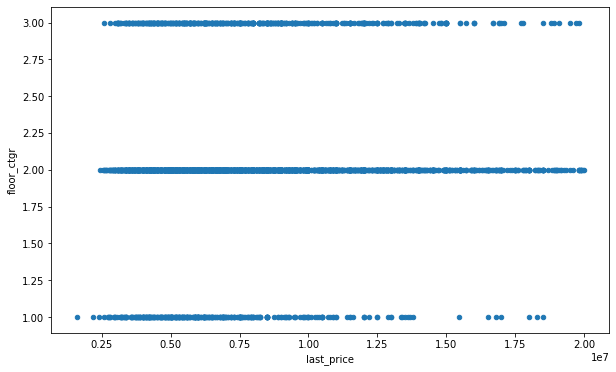

In [81]:
data_centre_peter.plot(x='last_price', y='floor_ctgr', kind='scatter', figsize=(10, 6));

Аналогично данным всей выборки, квартиры в центре на первом этаже заметно дешевле.

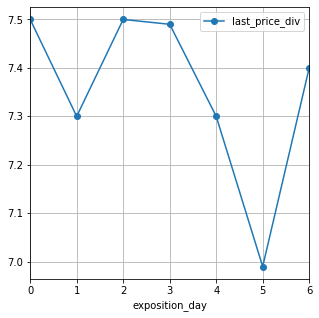

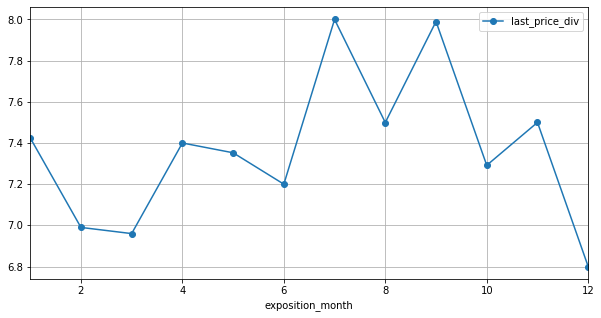

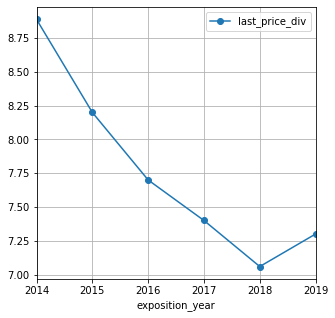

In [82]:
#медиана цен в день размещения
(
    data_centre_peter.pivot_table(index='exposition_day', values='last_price_div', aggfunc = 'median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

#медиана цен в месяц размещения
(
    data_centre_peter.pivot_table(index='exposition_month', values='last_price_div', aggfunc ='median')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()

#медиана цен в год размещения
(
    data_centre_peter.pivot_table(index='exposition_year', values='last_price_div', aggfunc ='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

In [83]:
data_centre_peter[['last_price', 'square_price', 'exposition_day', 'exposition_month', 'exposition_year']].corr()

,last_price,square_price,exposition_day,exposition_month,exposition_year
last_price,1.000000,0.494332,-0.023728,0.013996,-0.051241
square_price,0.494332,1.000000,0.007756,-0.009720,0.084171
exposition_day,-0.023728,0.007756,1.000000,0.000465,0.015341
exposition_month,0.013996,-0.009720,0.000465,1.000000,-0.279329
exposition_year,-0.051241,0.084171,0.015341,-0.279329,1.000000


In [84]:
#сравним с корреляцией по всем объявлениям
data[['last_price', 'square_price', 'exposition_day', 'exposition_month', 'exposition_year']].corr()

,last_price,square_price,exposition_day,exposition_month,exposition_year
last_price,1.000000,0.666525,-0.016410,0.007352,-0.021132
square_price,0.666525,1.000000,-0.012498,-0.002306,0.054106
exposition_day,-0.016410,-0.012498,1.000000,0.012706,-0.001548
exposition_month,0.007352,-0.002306,0.012706,1.000000,-0.269846
exposition_year,-0.021132,0.054106,-0.001548,-0.269846,1.000000


Можем отметить, что дороже продаются квартиры, объявления о продаже которых были опубликованы в начале недели, в будние дни. Самые высокие цены наблюдаются в понедельник и среду. Такое распределение цен идентично общим данным.
Что касается месяца размещения, то самыми прибыльными для размещения оказываются июль и сентябрь, в объявлениях, опубликованных зимой, мы находим самые выгодные предложения для покупки. Это отличается от данных по всем объявлениям: там, наоборот,  наблюдается спад цены летом и подъем зимой.
График зависимости цены от года показывает, что с момента пика цен в 2014 году началось их падение. В отличие от общей тенденции, где падение останавливается на период 2016-2017годов, здесь рост наблюдается только в 2018 году.

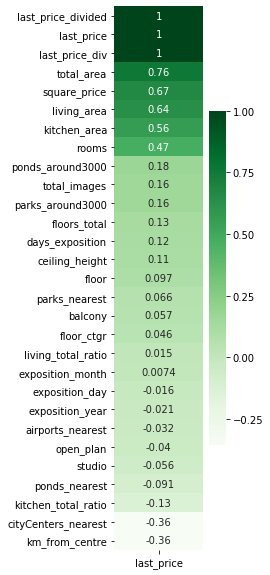

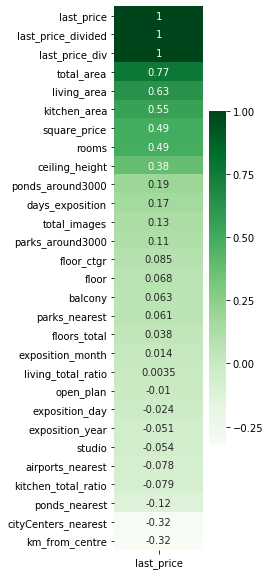

In [85]:
#для наглядности посмотрим на тепловую карту по цене:
plt.figure(figsize=(2,10))
sns.heatmap(data.corr()[['last_price']].sort_values(by='last_price', ascending=False), cmap="Greens", 
            annot=True);

plt.figure(figsize=(2,10))
sns.heatmap(data_centre_peter.corr()[['last_price']].sort_values(by='last_price', ascending=False), cmap="Greens", 
            annot=True);

Тепловая карта отразила ранее отмеченные факторы влияния на цену.

## Общий вывод

**1. Изучение данных.**


- В данных находим 23699 строки, много пропущенных значений.  Определены столбцы, данные которых не понадобятся в исследовании: 'ponds_nearest', 'ponds_around3000', 'parks_nearest', 'parks_around3000', 'airports_nearest', 'open_plan', 'studio', 'is_apartment'.

**2. Предобработка данных.**

- Заполнять пропущенные значения в столбце **'ceiling_height'** было признано нецелесообразным из-за большого количества пропусков и отсутствия связи столбца с другими столбцами. 
- В столбце **'floors_total'** похожая ситуация: корреляцию с другими данными для заполнения пропусков на ее основе найти нельзя, как и просто заполнить медианой. Тем не менее, столбец пригодится в дальнейшем исследовании, поэтому пропуски можем просто удалить, так как пропущенные строки составляют всего 0.38% процента от всего датасета (89 строк).
- Пропуски в столбцах **'living_area'** и **'kitchen_area'** заполнены при помощи группировки по данным **'total_area'**, зависимость от которых очевидна. Заполняем медианой по группам общей площади: для каждого размера квартиры своя медиана.
- Заменили пропуски на ноль в столбце **'balcony'**, приняв отсутствие информации за отсутствие балкона в квартире. 
- **'locality_name'** содержит небольшое количество пропусков, но часть их удалось заполнить, опираясь на данные столбца **'cityCenters_nearest'**. Оставшиеся 19 строк незначительны для всего датафрейма, поэтому были удалены из таблицы.
- Столбец **'days_exposition'** остается без изменений, так как данных достаточно для изолированного исследования. То же касается столбцов **'airports_nearest'**, **'parks_around3000'**, **'parks_nearest'**, **'ponds_around3'**, **'ponds_nearest'**: их данные не участвуют в исследовании. После удаления осталось удалось сохранить 99.56% от всего датасета. 

Приведение данных к нужным типам.

- Данные столбцов **'last_price'**, **'floors_total'**, **'balcony'**, **'days_exposition'** приведены к целочисленному типу.
- **'first_day_exposition'** изменен на формат datetime с помощью функции  Pandas .to_datetime(), чтобы в дальнейшем было возможным вычленять нужную информацию (день, месяц, год) из столбца.


**3.  Расчёты и добавление результатов в таблицу.**

- Цена квадратного метра, день недели, месяц и год публикации объявления, соотношение жилой и общей площади, отношение площади кухни к общей посчитаны простыми вычислениями, результаты помещены в отдельные новые столбцы.
- Категории этажей квартир: были определены с помощью функции и так же записаны в отдельный столбец.

**4. Исследовательский анализ данных.**

Удаление редких и выбивающихся значений

- Из данных по общей площади квартир были удалены обнаруженные на графиках выбивающиеся значения (площади меньше 20м² и больше 150м²). Их было насчитано 2% от всех данных столбца.
- После удаления выбивающихся значений (12190р и цены больше 20млн р) конечной цены на квартиру столбец "полегчал" на 1.48%.
- Из столбца **'ceiling_height'** удален выбивающийся стометровый потолок.

Какие факторы больше всего влияют на стоимость квартиры

- Площадь квартиры - главный фактор влияния на её цену. Площадь большинства квартир общая площадь находится в диапазоне от 30 до 75м². Большая их часть - однушки и двушки. Предсказуемо, количество комнат влияет на конечную цену квартиры, так как связано с общей площадью. 
- Самые распространенные цены квартир - от 2,5 млн рублей до 6 млн. 
- Высота потолков колеблется между 2мя и 3мя метрами, самая популярная высота - 2,65м.
- Приближение к центру влияет на повышение цены, жилье стоит дороже. То же можно сказать и про повышение цены квадратного метра.
- Стоит отметить заметное снижении цены в случаях, когда квартира находится на первом этаже.
- Первые 10 населенных пунктов по количеству объявлений - Санкт-Петербург, Мурино, поселок Шушары, Всеволожск, Пушкин, Колпино, поселок Парголово, Гатчина, деревня Кудрово, Выборг. Самая высокая средняя цена за квадратный метр находится в Санкт-Петербурге(108770р). Меньше всего средняя цена за квадратный метр в Выборге(58075р).
- При анализе центральной территории (9км) было выявлено, что здесь средний ценник на квартиру - от от 4 до 12,5 млн руб, больше всего цен находится в пределе от 5 до 7,5 млн руб, что значительно выше цен всей выборки.  
- Наибольшее число квартир имеет площадь от 35 до 80м², что совпадает с общими данными. 
- В отличие от данных по всем объявлениям, в в центре чаще продают двухкомнатные и трехкомнатые квартиры. 
- Потолки в "центральных" объявлениях в среднем выше.
- Аналогично данным всей выборки, квартиры в центре на первом этаже заметно дешевле.
- В целом можно сказать, что главные факторы влияния на цену квартиры сохраняются для обеих выборок.


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод